## Recreating stuff
Checking how things work differently/what plot looks like in the variables that sijie used.
Adapting this equation from Sijie's PLoS paper
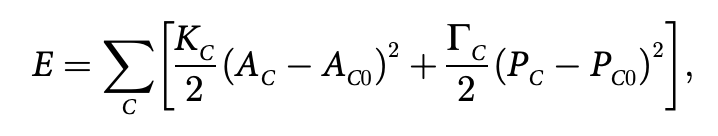

### What does the cell look like?
![title](2024_11_22_analytic_deform_img/diagram-20241122.png)



## Note:
In the following, $l_i$ is removed, so that $\alpha$ and $\beta$ have units of length.

In [27]:
import sympy
sympy.init_printing()


def create_area_symexp(
    s_alpha,
    s_beta,
):
    s_A = (sympy.sqrt(3)*3/2)*s_alpha*s_beta
    return s_A


def create_perim_symexp(
    s_alpha,
    s_beta,
):
    s_P = 2*s_alpha + 2*sympy.sqrt(s_alpha**2 + 3 * s_beta**2)
    return s_P


def area_energy_symexp(
    s_alpha,
    s_beta,
    s_Area_rest,
    s_K,
):
    s_Area = create_area_symexp(s_alpha, s_beta)
    return (s_K / 2) * (s_Area - s_Area_rest)**2
    

def perimeter_energy_symexp(
    s_alpha,
    s_beta,
    s_P_r,
    s_Gam,
):
    s_Perimeter = create_perim_symexp(s_alpha, s_beta)
    return (s_Gam/2) * (s_Perimeter - s_P_r)**2
    

def create_energy_symexp(
    s_alpha,
    s_beta,
    s_Area_rest,
    s_Perimeter_rest,
    s_K,
    s_Gam,
):
    s_E_area = area_energy_symexp(s_alpha, s_beta, s_Area_rest, s_K)
    s_E_perim = perimeter_energy_symexp(s_alpha, s_beta, s_Perimeter_rest, s_Gam)
    
    
    
    s_E = s_E_area + s_E_perim
    
    return s_E
    

alpha, beta = sympy.symbols("alpha beta", real=True, positive=True)
A_r, P_r = sympy.symbols("A_r P_r", real=True, positive=True)
K, Gam = sympy.symbols("K Gamma", real=True)

energy_basic = create_energy_symexp(
    alpha,beta, A_r, P_r, K, Gam,
)

sympy.Eq(
    sympy.Function('E')(alpha, beta, A_r, P_r, K, Gam),
    energy_basic,
)


### Changing variables
$$ \begin{align}
 \alpha &= \mu \tilde{\alpha} \\
 \beta &= \mu \tilde{\beta} \\
 \gamma &= \mu \tilde{\gamma} \\
P_r &= \mu \tilde{P_r} \\
\Gamma &= \frac{1}{\mu^2} \tilde{\Gamma}\\
A_r &= \mu^2 \tilde{A_r} \\
K &= \frac{1}{\mu^4} \tilde{K} \\
 \end{align}
 $$

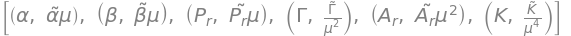

In [28]:
mu = sympy.symbols("mu", real=True, positive=True)

Gam_til, K_til, alpha_til, beta_til, P_r_til, A_r_til =  sympy.symbols(r"\tilde{\Gamma} \tilde{K} \tilde{\alpha} \tilde{\beta}  \tilde{P_r} \tilde{A_r}", real=True, positive=True)

tilde_mu_substitutions = [
    (alpha, alpha_til *mu),
    (beta, beta_til*mu),
    (P_r, P_r_til*mu),
    (Gam, Gam_til/mu**2),
    (A_r,  A_r_til*mu**2),
    (K, K_til / mu**4),
]

tilde_mu_substitutions

## Picking mu to equal $\sqrt{A_r}$

$$ \mu = \sqrt{A_r} $$
$$ A_r = \mu^2 \tilde{A_r} $$
$$ A_r = A_r \tilde{A_r} $$
$$  \tilde{A_r} = 1 $$

We can do change of variables to the energy equation:

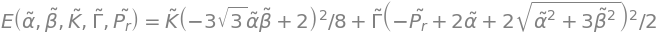

In [29]:
E_mu_subbed = energy_basic.subs(
    tilde_mu_substitutions
).simplify().subs([
    (A_r_til, 1)
])

sympy.Eq(
    sympy.Function("E")(alpha_til, beta_til, K_til, Gam_til ,P_r_til),
    E_mu_subbed,
)


### Sijie picked the ratio (well actually its inverse) $\Gamma/\left(KA_0\right)$ as a constant

$$ \frac{\Gamma}{K A_r} = \frac{\left(\tilde{\Gamma}/\mu^2\right)}{ \left( \tilde{K}/\mu^4 \right) \cdot \left( \mu^2 \tilde{A_r} \right) } $$


$$ \frac{\Gamma}{K A_r} = \frac{ \tilde{\Gamma} }{  \tilde{K} \tilde{A_r}  } $$

We can define this by the constant $Y$
$$ Y =\frac{\Gamma}{K A_r} = \frac{ \tilde{\Gamma} }{  \tilde{K} \tilde{A_r}  }\frac{ \tilde{\Gamma} }{  \tilde{K} \tilde{A_r}  } = \frac{ \tilde{\Gamma} }{  \tilde{K} } $$

### Substituting in:

$$ \tilde{\Gamma} = Y \tilde{K} $$

And scaling energy:
$$ \tilde{E} = E / \tilde{K} $$

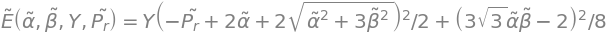

In [30]:
Y = sympy.symbols("Y", real=True, positive=True)

E_til = (1/K_til) * E_mu_subbed.subs([
    ( Gam_til, Y * K_til ),
]).simplify()


sympy.Eq(
    sympy.Function(r"\tilde{E}")(alpha_til, beta_til, Y,P_r_til),
    E_til,
)

### Can we find poisson ratio from the tilde energy?

$$ \nu =   \left.\frac{ \partial^2 E / \left(\partial  \alpha \partial \beta\right)  }{  \partial^2 E  / \partial \beta^2    }\right|_{\alpha=\beta=\gamma_{eq}} $$


$$ \nu =  \left. \frac{ \left(\tilde{K}/\mu^2 \right)\partial^2 \tilde{E} / \left(\partial  \tilde{\alpha} \partial \tilde{\beta}\right)  }{\left( \tilde{K} / \mu^2\right) \partial^2 \tilde{E} / \partial \tilde{\beta}^2    } \right|_{\tilde{\alpha}=\tilde{\beta}=\tilde{\gamma}_{eq}} $$

$$ \nu =  \left. \frac{ \partial^2 \tilde{E} / \left(\partial  \tilde{\alpha} \partial \tilde{\beta}\right)  }{\partial^2 \tilde{E} / \partial \tilde{\beta}^2    } \right|_{\tilde{\alpha}=\tilde{\beta}=\tilde{\gamma}_{eq}} $$

### Plugging in $\tilde{\alpha} = \tilde{\beta} = \tilde{\xi}$, then finding an equilibrium:


In [31]:

xi_til =  sympy.symbols(r"\tilde{\xi}", real=True, positive=True)

E_til_iso = E_til.subs([
    (alpha_til, xi_til),
    (beta_til, xi_til)
])

sympy.Eq(
    sympy.Function(r"\tilde{E}")(xi_til, Y,P_r_til),
    E_til_iso,
)

### Equilibrium is where derivative of E wrt xi is zero:
$$ \left.\frac{\partial \tilde{E}}{\partial \tilde{\xi}} \right|_{\tilde{\xi} = \tilde{\xi}_{eq}} = 0 $$

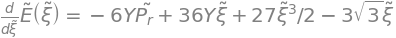

In [32]:
dE_dxi_symexp = E_til_iso.diff(xi_til).expand()

sympy.Eq(
    sympy.Derivative(sympy.Function(r"\tilde{E}")(xi_til), xi_til),
    dE_dxi_symexp
)

### Turning into a sympy polynomial:

In [33]:
dE_dxi_polynomial = sympy.Poly(dE_dxi_symexp, xi_til)

assert dE_dxi_polynomial.degree() == 3, "should be a cubic polynomial"

dE_dxi_polynomial

In [34]:
# d2E_d2xi_polynomial
d2E_dxi2_sym = dE_dxi_symexp.diff(xi_til).expand()
lambified_d2e_dxi2 = sympy.lambdify((xi_til, Y,P_r_til), d2E_dxi2_sym)

d2E_dxi2_sym

### Lambdifying the coefficients into python functions so we can find roots numerically:

In [35]:

### dE/dxi
dE_dxi_coeff_functions = []
for coeff_sym in dE_dxi_polynomial.all_coeffs():
    dE_dxi_coeff_functions.append(
        sympy.lambdify((Y,P_r_til), coeff_sym)
    )

dE_dxi_coeff_functions

[<function _lambdifygenerated(Y, Dummy_118)>,
 <function _lambdifygenerated(Y, Dummy_119)>,
 <function _lambdifygenerated(Y, Dummy_120)>,
 <function _lambdifygenerated(Y, Dummy_121)>]

In [36]:



# ### d^2 E / dxi^2
# d2E_d2xi_coeff_functions = []
# for coeff_sym in d2E_d2xi_polynomial.all_coeffs():
#     d2E_d2xi_coeff_functions.append(
#         sympy.lambdify((Y,P_r_til), coeff_sym)
#     )

# d2E_d2xi_coeff_functions

### Use numpy to find the positive, real root , which should be the equilibrium $\tilde{\xi}$

In [37]:
import numpy as np

def find_xi_til_equilibrium_numeric(Y_value, P_r_til_value):
    cubic_coeffs = [coeff_f(Y_value, P_r_til_value) for coeff_f in dE_dxi_coeff_functions]
    np_roots = np.roots(cubic_coeffs)
    ### We need to find the roots of 
    
    # Negative real values have angle pi, complex values have other, non-zero angle:
    real_pos_roots_mask = (np.angle(np_roots) == 0)

    real_roots = np_roots[real_pos_roots_mask].real

    minimum_roots = []
    for xi_root in real_roots:
        d2E_d2xi_at_root = lambified_d2e_dxi2(xi_root, Y_value, P_r_til_value)
        if d2E_d2xi_at_root > 0:
            minimum_roots.append(xi_root)
    
    # second_derivative_at_root
    # lambified_d2e_dxi2(
    # roots_imaginary_proportion = np.abs(np_roots.imag / np_roots.real)
    # real_pos_roots_mask = (roots_imaginary_proportion < 0.000001) * (np_roots.real > 0)
    
    
    
    if len(minimum_roots) != 1:
        # # print(np_roots)
        # print("roots: ", np_roots)
        # print("angle: ", np.angle(np_roots))
        raise ValueError("Failed to find real root - roots {}\n complex angles - {}".format(np_roots, np.angle(np_roots)))
    return minimum_roots[0]
    # return np_roots



In [38]:
def generate_lambdified_grad_and_hessian_function():
    gradient_element_funcs = []
    for i, i_var in enumerate([alpha_til, beta_til]):
        grad_element_sym = E_til.diff(i_var)

        gradient_element_funcs.append(
            sympy.lambdify((alpha_til, beta_til,Y,P_r_til),grad_element_sym),
        )
    
    hessian_mat_element_funcs = []
    for i, i_var in enumerate([alpha_til, beta_til]):
        hessian_elfunc_row = []
        for j, j_var in enumerate([alpha_til, beta_til]):
            hessian_el_symbol = E_til.diff(i_var, j_var)
            # return hessian_el_symbol
            hessian_elfunc_row.append(
                sympy.lambdify((alpha_til, beta_til,Y,P_r_til), hessian_el_symbol)
            )
        hessian_mat_element_funcs.append(hessian_elfunc_row)

    def gradient_function(alpha_t_value, beta_t_value, Y_value, P_r_til_value):
        grad_numeric = np.zeros((2,),dtype=float)
        for i in range(2):
            grad_numeric[i] = gradient_element_funcs[i](
                alpha_t_value,
                beta_t_value,
                Y_value,
                P_r_til_value,
            )
        return grad_numeric
        
    def hessian_function(alpha_t_value, beta_t_value, Y_value, P_r_til_value):
        hessian_numeric = np.zeros((2,2), dtype=float)
        for i in range(2):
            for j in range(2):
                hessian_numeric[i][j] = hessian_mat_element_funcs[i][j](
                    alpha_t_value,
                    beta_t_value,
                    Y_value,
                    P_r_til_value,
                )

        return hessian_numeric

    return gradient_function, hessian_function

get_gradient, get_hessian = generate_lambdified_grad_and_hessian_function()

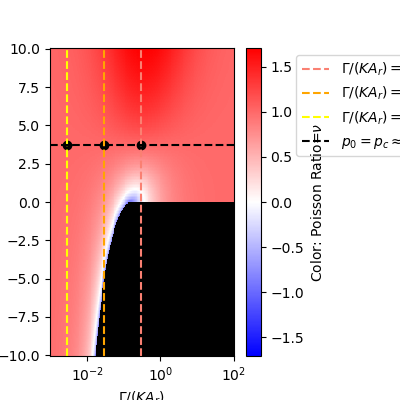

In [39]:
%matplotlib widget
# def get
from matplotlib import colormaps
from matplotlib import pyplot as plt

def get_important_vals_at_givenpoint(
    Y_value, # Defined as Gamma/(K*A0).
    P_r_tilvalue, # Defined in sijie's paper as p_0=P0/sqrt(A0).
):
    xi_til_eq = find_xi_til_equilibrium_numeric(
        Y_value,
        P_r_tilvalue,
    )
    gradient_at_eq = get_gradient(
        xi_til_eq,
        xi_til_eq,
        Y_value,
        P_r_tilvalue,
    )
    hessian_at_eq = get_hessian(
        xi_til_eq,
        xi_til_eq,
        Y_value,
        P_r_tilvalue,
    )
    poisson_ratio = hessian_at_eq[0][1] / hessian_at_eq[1][1]
    return {
        "poisson_ratio": poisson_ratio,
        "xi_til_eq": xi_til_eq,
    }

def plot_values_of_Y_and_Pr_til():
    Y_min = 0.001
    Y_max =  100
    Y_range = np.logspace(
        np.log10(Y_min),
        np.log10(Y_max),
        200,
    )
    
    Pr_t_min = -10
    Pr_t_max = 10
    Pr_t_range = np.linspace(
        Pr_t_min,
        Pr_t_max,
        200,
    )
    # Pr_t_range = np.logspace(
    #     np.log10(Pr_t_min),
    #     np.log10(Pr_t_max),
    #     100,
    # )
    Y_meshvals, Pr_t_meshvals = np.meshgrid(
        Y_range,
        Pr_t_range,
    )

    poisson_val_meshvals = np.zeros_like(Y_meshvals,dtype=float)
    for i in range(Y_meshvals.shape[0]):
        for j in range(Y_meshvals.shape[1]):
            try:
                vals_at_pt = get_important_vals_at_givenpoint(
                    Y_meshvals[i][j],
                    Pr_t_meshvals[i][j],
                )
                poisson_val_meshvals[i][j] = vals_at_pt["poisson_ratio"]
            except Exception as e:
                pass
                poisson_val_meshvals[i][j]=np.nan
                # print("Y: {}".format(Y_meshvals[i][j]))
                # print("Pr_t: {}".format(Pr_t_meshvals[i][j]))
                # pass
                # print(str(e))
                # break
            # except:
            #     pass


    ## Plot stuff
    plt.close('all')
    fig, ax = plt.subplots(1,1,figsize=(4,4))

    p_ratio_max_magnitude = np.abs(poisson_val_meshvals[~np.isnan(poisson_val_meshvals)]).max()

    cmap = colormaps['bwr']
    cmap.set_bad(color="black")

    im_poisson_ratio = ax.pcolormesh(
        Y_meshvals,
        Pr_t_meshvals,
        poisson_val_meshvals,
        cmap=cmap ,
        vmin= -p_ratio_max_magnitude,
        vmax=  p_ratio_max_magnitude,
    )
    # mpl.colormaps['viridis']

    cbar_poisson  =fig.colorbar(im_poisson_ratio, orientation='vertical', label=r"Color: Poisson Ratio=$\nu$")#, format=LogFormatterMathtext())
    
    ax.set_xscale('log')
    # ax.set_yscale('log')
    
    ax.set_xlabel(r"$\Gamma/(KA_r)$")
    ax.set_ylabel(r"$p_0=P_r/\sqrt{A_r}$")

    p0_crit = np.sqrt(24/np.sqrt(3))
    
    for Y_val, col in zip([
        1/3.4641,
        1/34.641,
        1/346.31,
    ], [
        "salmon",
        "orange",
        "yellow",
    ]):
        ax.axvline(
            Y_val,
            c=col,
            linestyle='--',
            label=r"$\Gamma/(KA_r)={:2f}$".format(Y_val),
        )
        ax.scatter(x=Y_val,y=p0_crit, color='black')


    ax.axhline(p0_crit,c='black',linestyle='--',label=r"$p_0=p_c \approx 3.722$")
    # for p_val, colname in zip([3.71,3.87], ["white", "white"]):
    #     ax.axhline(p_val,c='white',linestyle='--',linewidth=0.5,label=r"$p_0={:2f}$".format(p_val))
    # ax.axhline(np.sqrt(24/np.sqrt(3)),c='black',linestyle='--',label=r"$p_0=p_c \approx 3.722$")
    # ax[0].axhline(3.4641, c='black', linestyle='--')
    # ax[0].axhline(3.4, c='black', linestyle='--')
    # ax[0].axhline(3.4641, c='black', linestyle='--')

    plt.subplots_adjust(right=0.7)
    ax.legend(loc='upper left', bbox_to_anchor=(1.3, 1.0))
    
    plt.show()



plot_values_of_Y_and_Pr_til()
    
    # Xratio_range = (0.01, 1000)
    
    # A_r_til_range = ((np.sqrt(3)/24)*0.05 ,(np.sqrt(3)/24)*100000)

    # A_r_plot_vals = np.logspace(
    #         np.log10(A_r_til_range[0]),
    #         np.log10(A_r_til_range[1]),
    #         100,
    #     )

    # Xratio_plot_vals = np.logspace(
    #         np.log10(Xratio_range[0]),
    #         np.log10(Xratio_range[1]),
    #         100,
    #     )
    
    # A_r_til_vals, Xratio_vals = np.meshgrid(
    #     A_r_plot_vals,
    #     Xratio_plot_vals,
    # )
    
    
    

# How do we find the bulk modulus?
It's defined:
$$
B = -A \frac{dp}{dA}
$$

Where $p$ is pressure, $A$ is area. The expression should be evaluated at equilibrium

## Finding pressure
How is pressure defined? We can find it thru the expression for work done by hexagonal cell, through isotropic bulk compression:

$$
dE_{cell} = -p \cdot dA_{cell}
$$
$$ p = -\frac{dE_{cell}}{dA_{cell}}  $$

The change in area of a hexagonal cell is the perimeter, times the distance each of the six sides grows outwards. Referring back to the hexagon diagram, the distance from center to hexagon side is $r_{toside}=\beta l_i \sqrt{3}/2 = \xi \sqrt{3}/2$. so,

$$
dA_{cell} = P_{cell} \cdot d\left(r_{toside}\right) = 6\xi \cdot \frac{\sqrt{3}}{2}d\xi
$$

$$
dA_{cell} = 3\sqrt{3} \xi d\xi
$$
So,
$$ p = -\frac{dE_{cell}}{dA_{cell}} = -\frac{dE_{cell}}{3\sqrt{3} \xi d\xi} $$
$$ p = -\frac{1}{3\sqrt{3}\xi} \frac{dE_{cell}}{d\xi} $$

In [40]:
xi_reg =  sympy.symbols(r"\xi", real=True, positive=True)

energy_regular_iso = energy_basic.subs([
    (alpha, xi_reg),
    (beta, xi_reg),
])

sympy.Eq(
    sympy.Function('E')(xi_reg, A_r, P_r, K, Gam),
    energy_regular_iso,
)


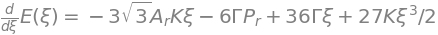

In [41]:
dE_regular_iso_dxi_symexp = energy_regular_iso.diff(xi_reg).expand()

sympy.Eq(
    sympy.Derivative(sympy.Function("E")(xi_reg), xi_reg),
    dE_regular_iso_dxi_symexp
)

In [42]:

pressure_reg_iso_exp = ( (-1) / (3 * sympy.sqrt(3) * xi_reg) ) * dE_regular_iso_dxi_symexp

pressure_reg_iso_exp = pressure_reg_iso_exp.simplify()

sympy.Eq(
    sympy.Function("p")(xi_reg),
    pressure_reg_iso_exp
)
# Gam
# pressure_exp

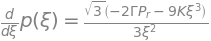

In [43]:
dpressure_dxi_reg_iso_exp = pressure_reg_iso_exp.diff(xi_reg).simplify()

sympy.Eq(
    sympy.Derivative(sympy.Function("p")(xi_reg), xi_reg),
    dpressure_dxi_reg_iso_exp
)

## Finding bulk modulus
Plugging in pressure definition for a regular hexagon cell:
$$
B = -A \frac{dp}{dA} = \left.-A \frac{dp}{d\xi}\frac{d\xi}{dA}\right|_{\xi=\xi_{eq}}
$$
We need to express area in terms of xi:
$$
A = \frac{3\sqrt{3}}{2}\xi^2
$$
$$
\frac{dA}{d\xi} = 3\sqrt{3}\xi
$$
$$
\frac{d\xi}{dA} = \frac{1}{3\sqrt{3}\xi}
$$

Then:
$$
B = \left.-A \frac{dp}{d\xi}\frac{1}{\frac{d\xi}{dA}}\right|_{\xi=\xi_{eq}}
$$
<!-- 
$$
B = \left. - \frac{1}{2}\xi \frac{dp}{d\xi}\right|_{\xi=\xi_{eq}}
$$ -->


In [44]:
Area_reg_iso_exp = ((3*xi_reg*xi_reg)*sympy.sqrt(3))/2
dArea_dxi_exp_regio = Area_reg_iso_exp.diff(xi_reg)
# dArea_dxi_exp_regio
Area_reg_iso_exp

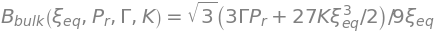

In [45]:
B_bulkmod_reg_iso = (-1)*Area_reg_iso_exp*dpressure_dxi_reg_iso_exp / dArea_dxi_exp_regio

sympy.Eq(
    sympy.Function(sympy.symbols(r"B_{bulk}"))(sympy.symbols(r"\xi_{eq}"), P_r, Gam, K),
    B_bulkmod_reg_iso.subs([
        (xi_reg, sympy.symbols(r"\xi_{eq}"))
    ])
)


Converting to tilde variables:

In [46]:

# # B_real_in_terms_of_tilde_vars_exp = B_bulkmod_reg_iso.subs

# # sympy.Eq(
# #     sympy.Function(sympy.symbols(r"B_{bulk}")),
# #     B_bulkmod_reg_iso.subs([
# #         (xi_reg, sympy.symbols(r"\xi_{eq}"))
# #     ])
# # )

# # .subs([
# #     (mu, sympy.sqrt(A_r) )
# # ])
# B_real_in_terms_of_tilde_vars_exp = B_bulkmod_reg_iso.subs(tilde_mu_substitutions).subs([
#     (xi_reg, xi_til * mu)
# ]).simplify()

# B_real_in_terms_of_tilde_vars_exp


In [47]:


# B_real_in_terms_of_tilde_vars_exp.subs([
#     ( Gam_til, Y * K_til )
# ]).simplify()